In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt

# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# Visit the Mars Facts site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

html = browser.html
html_soup = soup(html, 'html.parser')

In [3]:
table = html_soup.find_all('tr')

In [4]:
table_data = []

# Extract table headers from the first row of the table
headers = table[0].find_all('th')
header_text = [header.text for header in headers]

# Iterate through table to extract table data
for row in table:
    row_data = row.find_all('td')
    row_text = [x.text for x in row_data]
    table_data.append(row_text)

# Add header row
table_data[0] = header_text

In [5]:
# Convert table to Pabdas data frame
table_df = pd.DataFrame(table_data)
table_df

,0,1,2,3,4,5,6
0,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
# convert first row to the column headers
table_header = table_df.iloc[0]
table_df = table_df[1:]
table_df.columns = table_header

In [7]:
table_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [8]:
table_df.dtypes

0
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [9]:
#Convert data types
table_df[["id", "sol", "ls", "month", "min_temp", "pressure"]] = table_df[["id", "sol", "ls", "month", "min_temp", "pressure"]].apply(pd.to_numeric)
# Convert data types
table_df['terrestrial_date'] = table_df['terrestrial_date'].astype('datetime64[ns]')

C:\Users\johnm\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\johnm\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
table_df.dtypes

0
id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [11]:
# How many months exist on Mars? (Ans: 12)
table_df['month'].max()

12

In [12]:
table_df['month'].value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [13]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset? (Ans: 1867)
table_df['sol'].nunique()

1867

In [14]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
#(Ans: coldest is the 3rd month, warmest is the 8th month)
# Get the answer by averaging the minimum daily temperature of all the months
month_group = table_df.groupby("month")["min_temp"].mean()
print(month_group)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


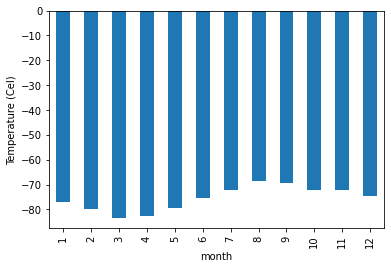

In [16]:
# Plot the results as a bar chart.
month_group.plot(kind= "bar")
plt.ylabel("Temperature (Cel)")
plt.show();

In [18]:
# Which months have the lowest and the highest atmospheric pressure on Mars?
# (Ans: lowest: 6th month, highest: 9th month)
# Get the answer by averaging the daily atmospheric pressure of all the months
month_pressure = table_df.groupby("month")["pressure"].mean()
print(month_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


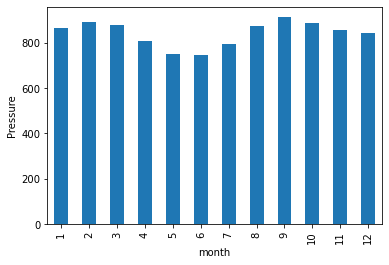

In [19]:
# Plot the results as a bar chart
month_pressure.plot(kind= "bar")
plt.ylabel("Pressure")
plt.show();

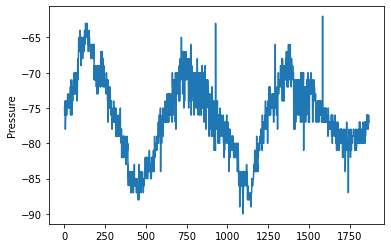

In [20]:
table_df.min_temp.plot()
plt.ylabel("Pressure")
plt.show();

<AxesSubplot:xlabel='terrestrial_date'>

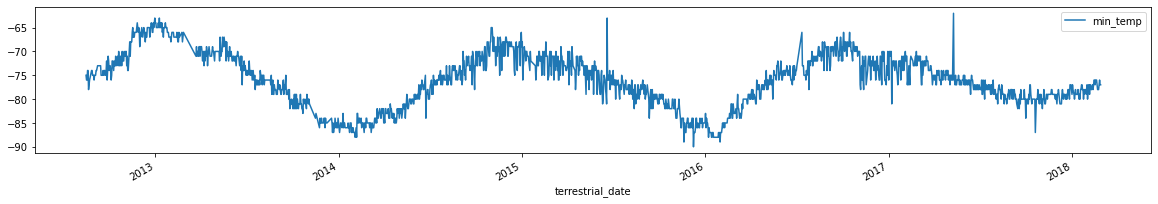

In [21]:
# About how many terrestrial (Earth) days exist in a Martian year?
# (Ans: about 715 days)
# Visually estimate the result by plotting the daily minimum temperature
table_df.plot(x = "terrestrial_date", y = "min_temp", figsize = (20, 3))

In [24]:
# Export the DataFrame to a CSV file
table_df.to_csv("Mars_Temp.csv", index=False)

In [25]:
browser.quit()